In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import *
from utils.model_utils import *
from utils.train_utils import *
from utils.metrics import *
from utils.visualization import *

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 16
learning_rate = 0.0003
num_classes = 2
model_name = "efficientnet_b0"
output_dir = "outputs/models/augmented"
metrics_output_dir = "outputs/plots/augmented"
os.makedirs(output_dir, exist_ok=True)


In [5]:
print("[INFO] Loading augmented datasets...")
train_loader, val_loader, test_loader = load_datasets(
    data_dir=data_dir, batch_size=batch_size, augmentation="augmented"
)
print("[INFO] Augmented datasets loaded successfully!")

2024-12-23 21:02:38,903 - INFO - Loading datasets from wildfire_dataset_scaled with augmentation type 'augmented'.
2024-12-23 21:02:38,904 - INFO - Applying selected augmentations for wildfire scenarios.
2024-12-23 21:02:38,918 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/train
2024-12-23 21:02:38,922 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/val
2024-12-23 21:02:38,926 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/test
2024-12-23 21:02:38,927 - INFO - Datasets initialized. Preparing DataLoaders...
2024-12-23 21:02:38,928 - INFO - Using WeightedRandomSampler for class balancing.
2024-12-23 21:02:38,929 - INFO - Computing class weights from directory: wildfire_dataset_scaled/train
2024-12-23 21:02:38,933 - INFO - Class 'fire' has 730 samples.
2024-12-23 21:02:38,936 - INFO - Class 'nofire' has 1157 samples.
2024-12-23 21:02:38,936 - INFO - Computed class weights: {'fire': 1.0, 'nofire': 

[INFO] Loading augmented datasets...


2024-12-23 21:02:52,670 - INFO - DataLoaders created successfully.


[INFO] Augmented datasets loaded successfully!


In [6]:
# Initialize the model
print(f"\n[INFO] Starting Training for Model: {model_name} with Augmented Data\n")
print(f"[INFO] Initializing {model_name} model...")
model = initialize_model(
    model_name=model_name,
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Baseline augmentation: Freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Training for Model: efficientnet_b0 with Augmented Data

[INFO] Initializing efficientnet_b0 model...
[INFO] Model initialized successfully!


In [7]:
# Define loss function and optimizer
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [8]:
# Train the model
from torch.optim.lr_scheduler import StepLR

scheduler = StepLR(optimizer, step_size=5, gamma=0.5)

print("[INFO] Starting model training with augmented data...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,  # No LR scheduler for augmented baseline
    device=device,
    save_path=os.path.join(output_dir, f"{model_name}_augmented.pt"),
    early_stop_patience=12,  # Early stopping patience
    monitor_metric="val_f1"
)
print("[INFO] Training completed successfully!")

[INFO] Starting model training with augmented data...

Starting training...



[INFO] Learning rate adjusted to: 0.000300
[INFO] Best model saved with val_f1: 0.8356
Epoch [1]: Train Loss: 0.6231, Train Acc: 0.6471 | Val Loss: 0.5379, Val Acc: 0.7935, Val Recall: 0.8577, Val F1: 0.8356


[INFO] Learning rate adjusted to: 0.000300
[INFO] No improvement in val_f1. Patience: 1/12
Epoch [2]: Train Loss: 0.5274, Train Acc: 0.7583 | Val Loss: 0.4836, Val Acc: 0.7861, Val Recall: 0.7724, Val F1: 0.8155


[INFO] Learning rate adjusted to: 0.000300
[INFO] Best model saved with val_f1: 0.8548
Epoch [3]: Train Loss: 0.4819, Train Acc: 0.7811 | Val Loss: 0.4342, Val Acc: 0.8209, Val Recall: 0.8618, Val F1: 0.8548


[INFO] Learning rate adjusted to: 0.000300
[INFO] Best model saved with val_f1: 0.8560
Epoch [4]: Train Loss: 0.4556, Train Acc: 0.7923 | Val Loss: 0.4124, Val Acc: 0.8259, Val Recall: 0.8455, Val F1: 0.8560


[INFO] Learning rate adjusted to: 0.000150
[INFO] Best model saved with val_f1: 0.8605
Epoch [5]: Train Loss: 0.4327, Train Acc: 0.8103 | Val Loss: 0.3981, Val Acc: 0.8209, Val Recall: 0.9024, Val F1: 0.8605


[INFO] Learning rate adjusted to: 0.000150
[INFO] No improvement in val_f1. Patience: 1/12
Epoch [6]: Train Loss: 0.4304, Train Acc: 0.8013 | Val Loss: 0.4115, Val Acc: 0.8134, Val Recall: 0.8455, Val F1: 0.8473


[INFO] Learning rate adjusted to: 0.000150
[INFO] Best model saved with val_f1: 0.8727
Epoch [7]: Train Loss: 0.4258, Train Acc: 0.8013 | Val Loss: 0.3911, Val Acc: 0.8433, Val Recall: 0.8780, Val F1: 0.8727


[INFO] Learning rate adjusted to: 0.000150
[INFO] No improvement in val_f1. Patience: 1/12
Epoch [8]: Train Loss: 0.3970, Train Acc: 0.8246 | Val Loss: 0.3883, Val Acc: 0.8209, Val Recall: 0.8415, Val F1: 0.8519


[INFO] Learning rate adjusted to: 0.000150
[INFO] No improvement in val_f1. Patience: 2/12
Epoch [9]: Train Loss: 0.4006, Train Acc: 0.8198 | Val Loss: 0.3830, Val Acc: 0.8383, Val Recall: 0.8943, Val F1: 0.8713


[INFO] Learning rate adjusted to: 0.000075
[INFO] Best model saved with val_f1: 0.8785
Epoch [10]: Train Loss: 0.4144, Train Acc: 0.8151 | Val Loss: 0.3744, Val Acc: 0.8507, Val Recall: 0.8821, Val F1: 0.8785


[INFO] Learning rate adjusted to: 0.000075
[INFO] No improvement in val_f1. Patience: 1/12
Epoch [11]: Train Loss: 0.3942, Train Acc: 0.8272 | Val Loss: 0.3790, Val Acc: 0.8308, Val Recall: 0.8821, Val F1: 0.8645


[INFO] Learning rate adjusted to: 0.000075
[INFO] No improvement in val_f1. Patience: 2/12
Epoch [12]: Train Loss: 0.4308, Train Acc: 0.7965 | Val Loss: 0.3775, Val Acc: 0.8333, Val Recall: 0.8618, Val F1: 0.8635


[INFO] Learning rate adjusted to: 0.000075
[INFO] No improvement in val_f1. Patience: 3/12
Epoch [13]: Train Loss: 0.3929, Train Acc: 0.8209 | Val Loss: 0.3770, Val Acc: 0.8408, Val Recall: 0.8862, Val F1: 0.8720


[INFO] Learning rate adjusted to: 0.000075
[INFO] No improvement in val_f1. Patience: 4/12
Epoch [14]: Train Loss: 0.4134, Train Acc: 0.8172 | Val Loss: 0.3688, Val Acc: 0.8333, Val Recall: 0.8699, Val F1: 0.8646


[INFO] Learning rate adjusted to: 0.000037
[INFO] No improvement in val_f1. Patience: 5/12
Epoch [15]: Train Loss: 0.4133, Train Acc: 0.8140 | Val Loss: 0.3722, Val Acc: 0.8408, Val Recall: 0.8577, Val F1: 0.8683


[INFO] Learning rate adjusted to: 0.000037
[INFO] No improvement in val_f1. Patience: 6/12
Epoch [16]: Train Loss: 0.4177, Train Acc: 0.8140 | Val Loss: 0.3672, Val Acc: 0.8284, Val Recall: 0.8740, Val F1: 0.8617


[INFO] Learning rate adjusted to: 0.000037
[INFO] Best model saved with val_f1: 0.8893
Epoch [17]: Train Loss: 0.3981, Train Acc: 0.8235 | Val Loss: 0.3511, Val Acc: 0.8607, Val Recall: 0.9146, Val F1: 0.8893


[INFO] Learning rate adjusted to: 0.000037
[INFO] No improvement in val_f1. Patience: 1/12
Epoch [18]: Train Loss: 0.3968, Train Acc: 0.8203 | Val Loss: 0.3809, Val Acc: 0.8383, Val Recall: 0.8659, Val F1: 0.8676


[INFO] Learning rate adjusted to: 0.000037
[INFO] No improvement in val_f1. Patience: 2/12
Epoch [19]: Train Loss: 0.3965, Train Acc: 0.8193 | Val Loss: 0.3819, Val Acc: 0.8209, Val Recall: 0.8374, Val F1: 0.8512


[INFO] Learning rate adjusted to: 0.000019
[INFO] No improvement in val_f1. Patience: 3/12
Epoch [20]: Train Loss: 0.4286, Train Acc: 0.8013 | Val Loss: 0.3586, Val Acc: 0.8333, Val Recall: 0.8618, Val F1: 0.8635


[INFO] Learning rate adjusted to: 0.000019
[INFO] No improvement in val_f1. Patience: 4/12
Epoch [21]: Train Loss: 0.3936, Train Acc: 0.8241 | Val Loss: 0.3646, Val Acc: 0.8582, Val Recall: 0.8902, Val F1: 0.8848


[INFO] Learning rate adjusted to: 0.000019
[INFO] Best model saved with val_f1: 0.8907
Epoch [22]: Train Loss: 0.3900, Train Acc: 0.8299 | Val Loss: 0.3582, Val Acc: 0.8657, Val Recall: 0.8943, Val F1: 0.8907


[INFO] Learning rate adjusted to: 0.000019
[INFO] No improvement in val_f1. Patience: 1/12
Epoch [23]: Train Loss: 0.3913, Train Acc: 0.8378 | Val Loss: 0.3541, Val Acc: 0.8458, Val Recall: 0.8821, Val F1: 0.8750


[INFO] Learning rate adjusted to: 0.000019
[INFO] No improvement in val_f1. Patience: 2/12
Epoch [24]: Train Loss: 0.3902, Train Acc: 0.8214 | Val Loss: 0.3698, Val Acc: 0.8333, Val Recall: 0.8577, Val F1: 0.8630


[INFO] Learning rate adjusted to: 0.000009
[INFO] No improvement in val_f1. Patience: 3/12
Epoch [25]: Train Loss: 0.4018, Train Acc: 0.8172 | Val Loss: 0.3580, Val Acc: 0.8358, Val Recall: 0.8618, Val F1: 0.8653


[INFO] Learning rate adjusted to: 0.000009
[INFO] No improvement in val_f1. Patience: 4/12
Epoch [26]: Train Loss: 0.3944, Train Acc: 0.8256 | Val Loss: 0.3856, Val Acc: 0.8308, Val Recall: 0.8496, Val F1: 0.8601


[INFO] Learning rate adjusted to: 0.000009
[INFO] No improvement in val_f1. Patience: 5/12
Epoch [27]: Train Loss: 0.3914, Train Acc: 0.8246 | Val Loss: 0.3751, Val Acc: 0.8259, Val Recall: 0.8374, Val F1: 0.8548


[INFO] Learning rate adjusted to: 0.000009
[INFO] No improvement in val_f1. Patience: 6/12
Epoch [28]: Train Loss: 0.4015, Train Acc: 0.8235 | Val Loss: 0.3599, Val Acc: 0.8607, Val Recall: 0.8740, Val F1: 0.8848


[INFO] Learning rate adjusted to: 0.000009
[INFO] No improvement in val_f1. Patience: 7/12
Epoch [29]: Train Loss: 0.3739, Train Acc: 0.8415 | Val Loss: 0.3758, Val Acc: 0.8433, Val Recall: 0.8496, Val F1: 0.8690


[INFO] Learning rate adjusted to: 0.000005
[INFO] No improvement in val_f1. Patience: 8/12
Epoch [30]: Train Loss: 0.3743, Train Acc: 0.8400 | Val Loss: 0.3679, Val Acc: 0.8333, Val Recall: 0.8699, Val F1: 0.8646


[INFO] Learning rate adjusted to: 0.000005
[INFO] No improvement in val_f1. Patience: 9/12
Epoch [31]: Train Loss: 0.4038, Train Acc: 0.8241 | Val Loss: 0.3659, Val Acc: 0.8408, Val Recall: 0.8821, Val F1: 0.8715


[INFO] Learning rate adjusted to: 0.000005
[INFO] No improvement in val_f1. Patience: 10/12
Epoch [32]: Train Loss: 0.3827, Train Acc: 0.8347 | Val Loss: 0.3561, Val Acc: 0.8483, Val Recall: 0.9024, Val F1: 0.8792


[INFO] Learning rate adjusted to: 0.000005
[INFO] No improvement in val_f1. Patience: 11/12
Epoch [33]: Train Loss: 0.4008, Train Acc: 0.8177 | Val Loss: 0.3739, Val Acc: 0.8308, Val Recall: 0.8577, Val F1: 0.8612


[INFO] Learning rate adjusted to: 0.000005
[INFO] No improvement in val_f1. Patience: 12/12
Epoch [34]: Train Loss: 0.3879, Train Acc: 0.8341 | Val Loss: 0.3677, Val Acc: 0.8458, Val Recall: 0.8943, Val F1: 0.8765
[INFO] Final metrics saved to outputs/models/augmented\final_metrics.json
[INFO] Training stopped after 34 epochs. Best val_f1: 0.8907

[INFO] Training completed successfully!


In [9]:
# Evaluate the model
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device,
    model_name=model_name,
    save_base_path=metrics_output_dir+f"/{model_name}_augmented"
)
print(f"\n[INFO] Metrics for {model_name} with Augmented Data:\n{metrics}")

[INFO] Evaluating the model...
[INFO] Evaluation metrics saved to outputs/plots/augmented/efficientnet_b0_augmented\efficientnet_b0\efficientnet_b0_evaluation.json

[INFO] Metrics for efficientnet_b0 with Augmented Data:
{'classification_report': {'No Fire': {'precision': 0.8947368421052632, 'recall': 0.8553459119496856, 'f1-score': 0.8745980707395499, 'support': 159.0}, 'Fire': {'precision': 0.9108527131782945, 'recall': 0.9362549800796812, 'f1-score': 0.9233791748526523, 'support': 251.0}, 'accuracy': 0.9048780487804878, 'macro avg': {'precision': 0.9027947776417788, 'recall': 0.8958004460146833, 'f1-score': 0.898988622796101, 'support': 410.0}, 'weighted avg': {'precision': 0.9046028997621678, 'recall': 0.9048780487804878, 'f1-score': 0.9044616247209857, 'support': 410.0}}, 'confusion_matrix': [[136, 23], [16, 235]], 'roc_auc': 0.949685534591195, 'y_true': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[INFO] Saving training and evaluation results...
[INFO] Training plot saved to outputs/plots/augmented\efficientnet_b0_augmented_training_curve.png
[INFO] Confusion matrix saved to outputs/plots/augmented\efficientnet_b0_augmented_confusion_matrix.png
[INFO] ROC curve saved to outputs/plots/augmented\efficientnet_b0_augmented_roc_curve.png
[INFO] Precision-Recall curve saved to outputs/plots/augmented\efficientnet_b0_augmented_precision_recall.png
[INFO] All results saved successfully!


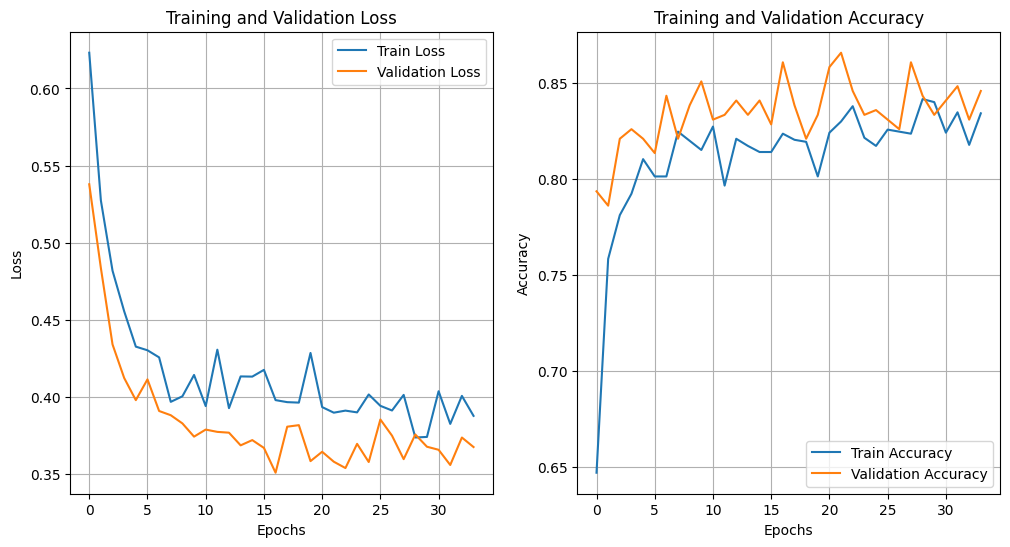

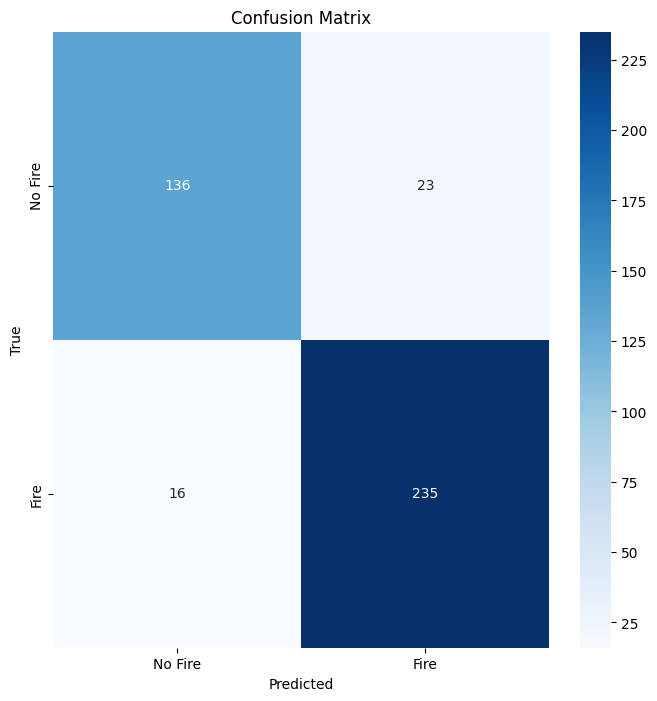

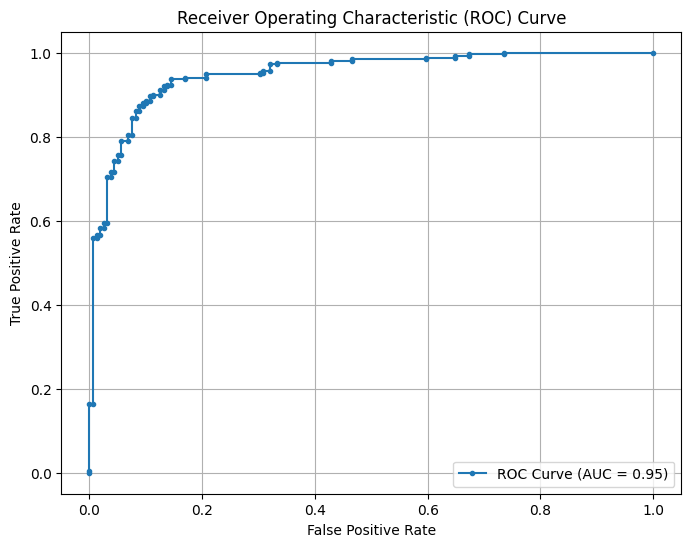

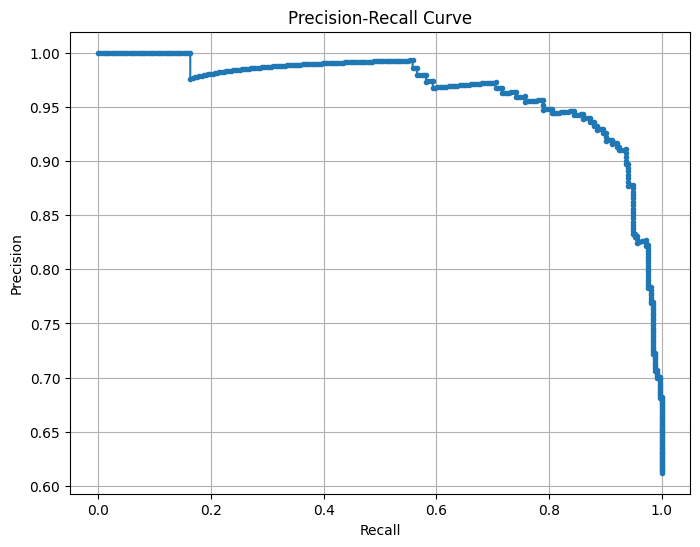

In [10]:
print("[INFO] Saving training and evaluation results...")

# Training curve
plot_training(
    history, output_path=os.path.join(metrics_output_dir, f"{model_name}_augmented_training_curve.png")
)

# Confusion matrix
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path=os.path.join(metrics_output_dir, f"{model_name}_augmented_confusion_matrix.png")
)

# ROC Curve
plot_roc_curve(
    y_true=metrics["y_true"],
    y_scores=metrics["y_scores"],
    output_path=os.path.join(metrics_output_dir, f"{model_name}_augmented_roc_curve.png")
)

# Precision-Recall Curve
plot_precision_recall(
    y_true=metrics["y_true"],
    y_scores=metrics["y_scores"],
    output_path=os.path.join(metrics_output_dir, f"{model_name}_augmented_precision_recall.png")
)

print("[INFO] All results saved successfully!")